<a href="https://colab.research.google.com/github/Musungu-Maureen/IP_WEEK_13/blob/main/MAUREEN_MUSUNGU_IP_WEEK_13_CORE_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title

## Defining the Question

### a) Specifying the Data Analytic Question

This project seeks to build a model that would enable us cluster our data into distinct categories.  

### b) Defining the Metric for Success

The project will be considered successful when we manage to build clustering models with high precision levels. 

### c) Understanding the Context

Kira Plastinina (Links to an external site.) is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups. 

### d) Experimental Design



a. Acquire the dataset with appropriate data for our project  
b. Perform data cleaning    
c. Perform univariate and bivariate analysis to gain insights on the given data  
d. Build a  clustering model  
e. Give conclusions and recommendations

### e) Data Relevance

The availed dataset is valid for our study. 

## Loading the Data

In [1]:
# loading the relevant packages
library("data.table")
library("tidyverse")
devtools::install_github("moodymudskipper/cutr")
library(cutr)
devtools::install_github("paulponcet/modeest")
library(modeest)
install.packages('moments')
library(moments)
install.packages('janitor')
library(janitor)
install.packages("ggcorrplot")
library(ggcorrplot)
install.packages("factoextra") 
library(factoextra)
install.packages("NbClust")
library(NbClust)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()




✔  checking for file ‘/tmp/RtmppqEYHV/remotes3d19b97910/moodymudskipper-cutr-7b8e9cd/DESCRIPTION’
─  preparing ‘cutr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘cutr_0.0.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




timeDate   (NA -> 3043.102 ) [CRAN]
clue       (NA -> 0.3-60   ) [CRAN]
stabledist (NA -> 0.7-1    ) [CRAN]
rmutil     (NA -> 1.1.5    ) [CRAN]
gss        (NA -> 2.2-3    ) [CRAN]
timeSeries (NA -> 3062.100 ) [CRAN]
statip     (NA -> 0.2.3    ) [CRAN]
stable     (NA -> 1.1.4    ) [CRAN]
fBasics    (NA -> 3042.89.1) [CRAN]


Installing 9 packages: timeDate, clue, stabledist, rmutil, gss, timeSeries, statip, stable, fBasics

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmppqEYHV/remotes3d39cf2f89/paulponcet-modeest-a168f94/DESCRIPTION’
─  preparing ‘modeest’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘modeest_2.4.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'rmutil':
  method         from
  print.response httr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘moments’


The following object is masked from ‘package:modeest’:

    skewness


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipre

In [2]:
# load the dataset 
data <- fread('http://bit.ly/EcommerceCustomersDataset')

## Reading the Data

In [3]:
# preview top of our dataset

head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [4]:
# Checking the number of rows and columns

dim(data)

[1] 12330    18

## Tidying the Data

**Column Names**

In [5]:
# Changing column names to lower case
names(data) <- tolower(names(data))
colnames(data)

[1] "administrative"          "administrative_duration"
 [3] "informational"           "informational_duration" 
 [5] "productrelated"          "productrelated_duration"
 [7] "bouncerates"             "exitrates"              
 [9] "pagevalues"              "specialday"             
[11] "month"                   "operatingsystems"       
[13] "browser"                 "region"                 
[15] "traffictype"             "visitortype"            
[17] "weekend"                 "revenue"

**Duplicates**

In [6]:
# Checking for duplicated entries
anyDuplicated(data)

[1] 159

There are 159 duplicate entries which we shall drop. 

In [7]:
# Dropping the duplicates

data<- data[!duplicated(data)]
anyDuplicated(data)

[1] 0

**Missing Values**

In [8]:
# Checking for missing values

colSums(is.na(data))

administrative administrative_duration           informational 
                     12                      12                      12 
 informational_duration          productrelated productrelated_duration 
                     12                      12                      12 
            bouncerates               exitrates              pagevalues 
                     12                      12                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend                 revenue 
                      0                       0                       0

In [9]:
# drop the missing values

data <-  na.omit(data)
colSums(is.na(data))

administrative administrative_duration           informational 
                      0                       0                       0 
 informational_duration          productrelated productrelated_duration 
                      0                       0                       0 
            bouncerates               exitrates              pagevalues 
                      0                       0                       0 
             specialday                   month        operatingsystems 
                      0                       0                       0 
                browser                  region             traffictype 
                      0                       0                       0 
            visitortype                 weekend                 revenue 
                      0                       0                       0

**Outliers**

In [11]:
head(data, 2)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE


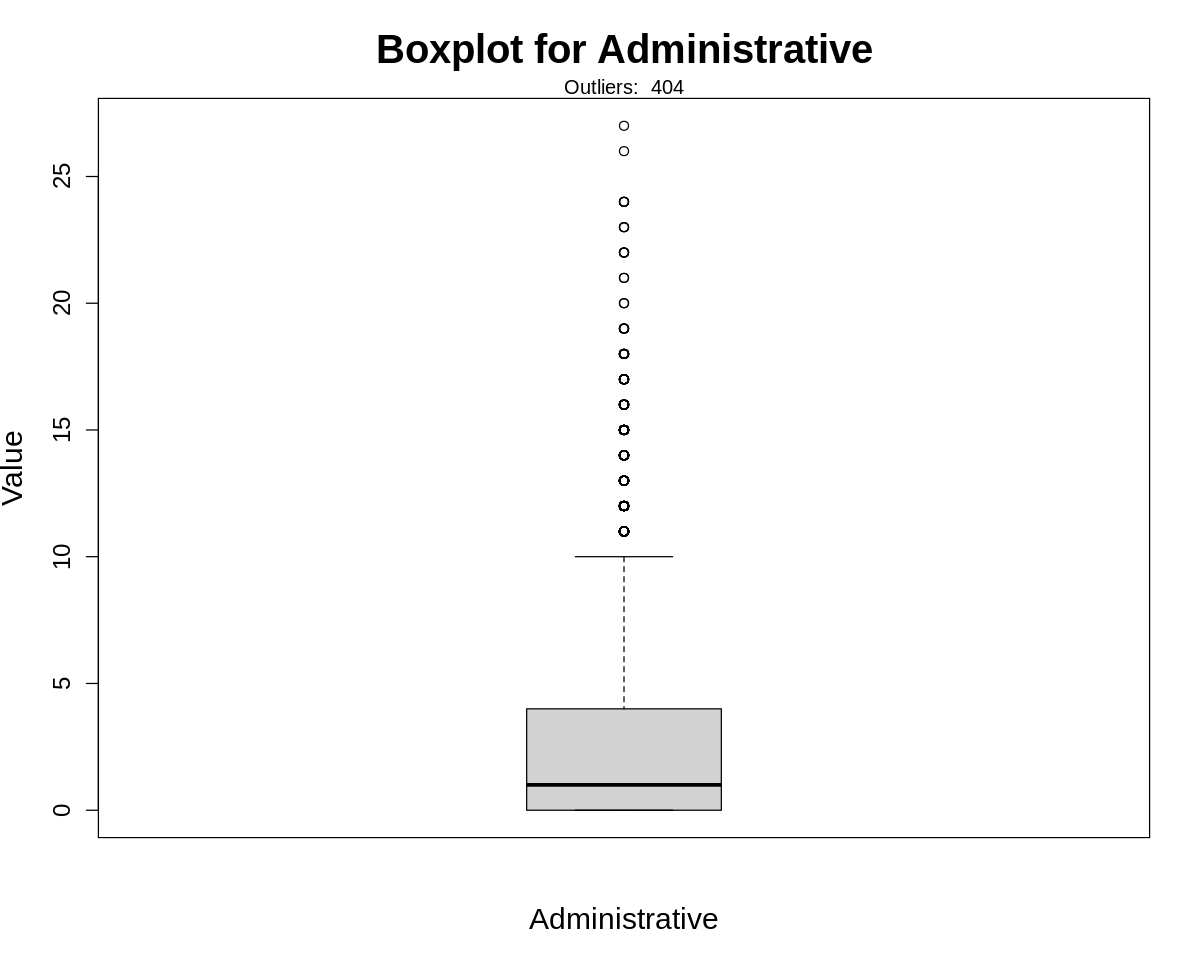

In [13]:
# plot a boxplot to check for outliers in the 'administrative' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$administrative, main="Boxplot for Administrative", xlab = "Administrative", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_administrative <- boxplot.stats(data$administrative)$out
mtext(paste("Outliers: ", paste(length(outlier_administrative), collapse=", ")), cex=1)

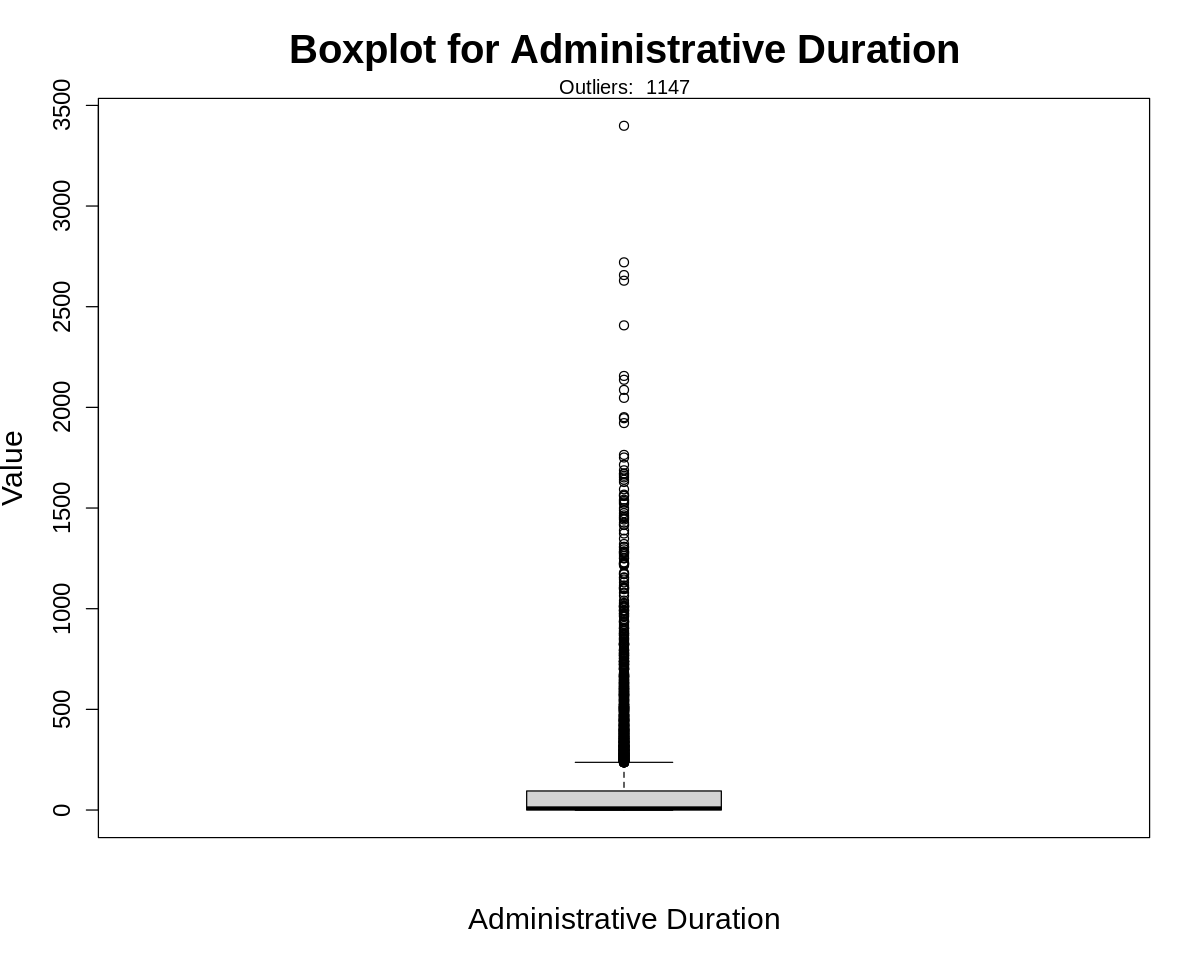

In [18]:
# plot a boxplot to check for outliers in the 'administrative_duration' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$administrative_duration, main="Boxplot for Administrative Duration", xlab = "Administrative Duration", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_administrative_duration <- boxplot.stats(data$administrative_duration)$out
mtext(paste("Outliers: ", paste(length(outlier_administrative_duration), collapse=", ")), cex=1)

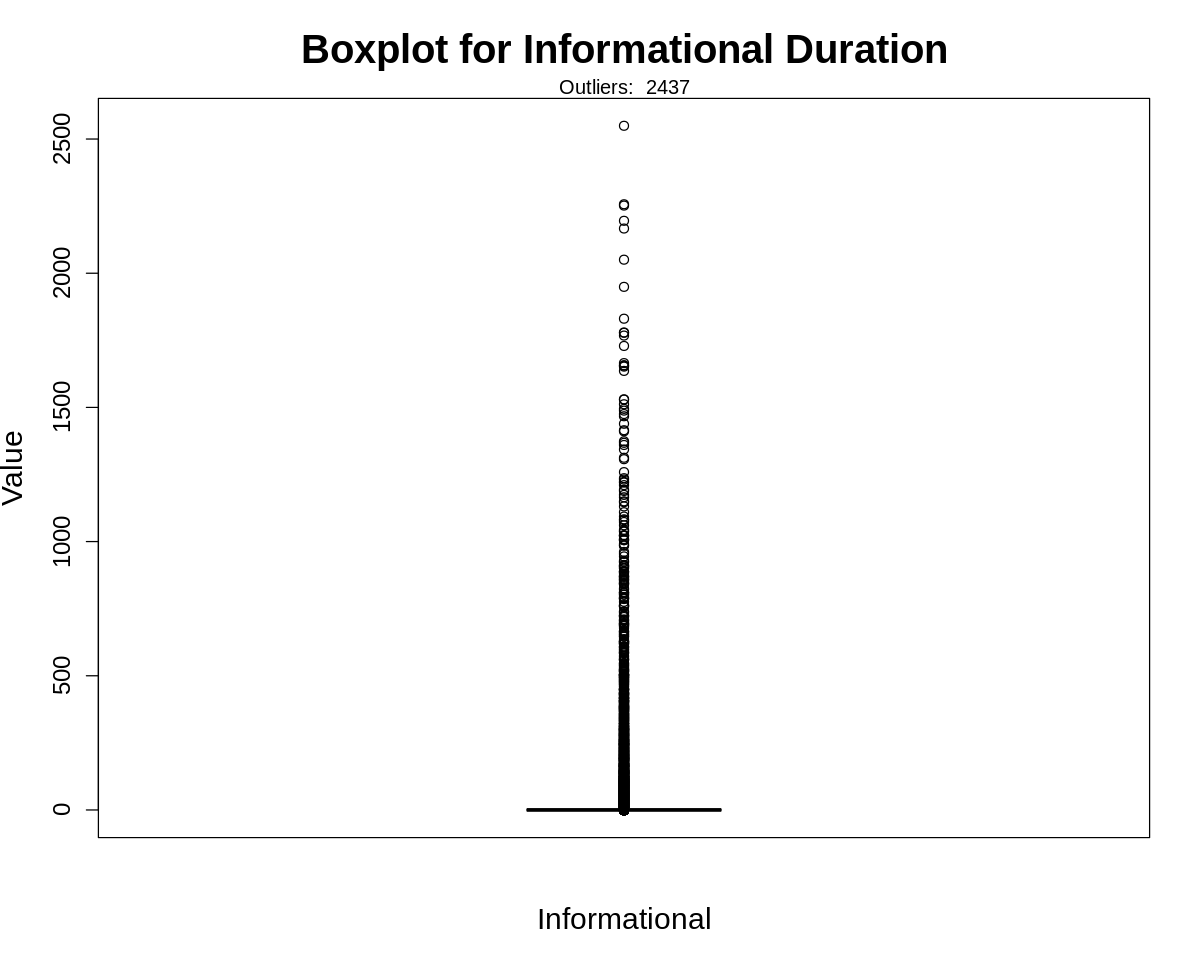

In [17]:
# plot a boxplot to check for outliers in the 'informational_duration' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$informational_duration, main="Boxplot for Informational Duration", xlab = "Informational", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_informational_duration <- boxplot.stats(data$informational_duration)$out
mtext(paste("Outliers: ", paste(length(outlier_informational_duration), collapse=", ")), cex=1)

In [ ]:
# plot a boxplot to check for outliers in the 'informational' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$informational, main="Boxplot for Informational", xlab = "Informational", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_administrative <- boxplot.stats(data$informational)$out
mtext(paste("Outliers: ", paste(length(outlier_administrative), collapse=", ")), cex=1)

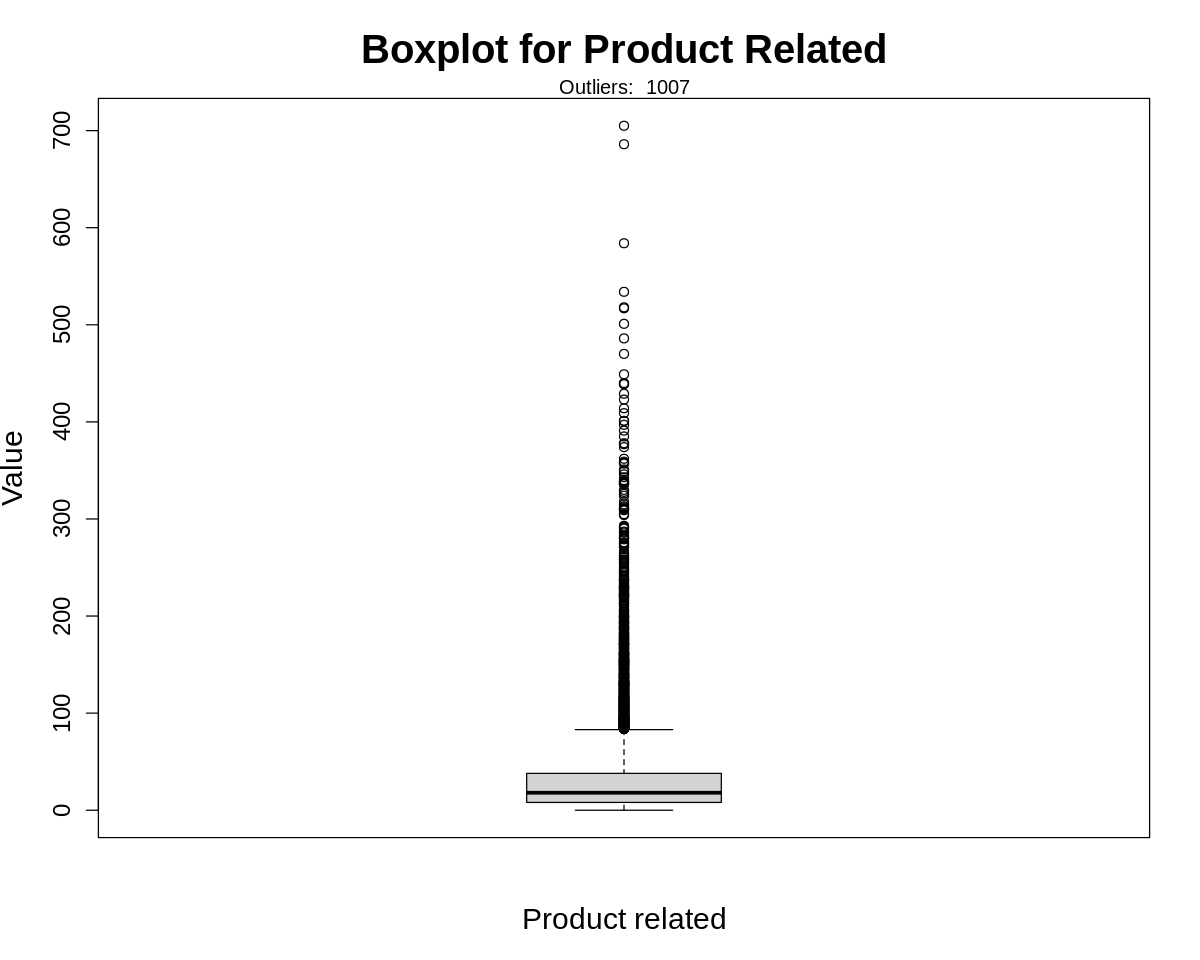

In [19]:
# plot a boxplot to check for outliers in the 'product_related' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$productrelated, main="Boxplot for Product Related", xlab = "Product related", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_productrelated <- boxplot.stats(data$productrelated)$out
mtext(paste("Outliers: ", paste(length(outlier_productrelated), collapse=", ")), cex=1)

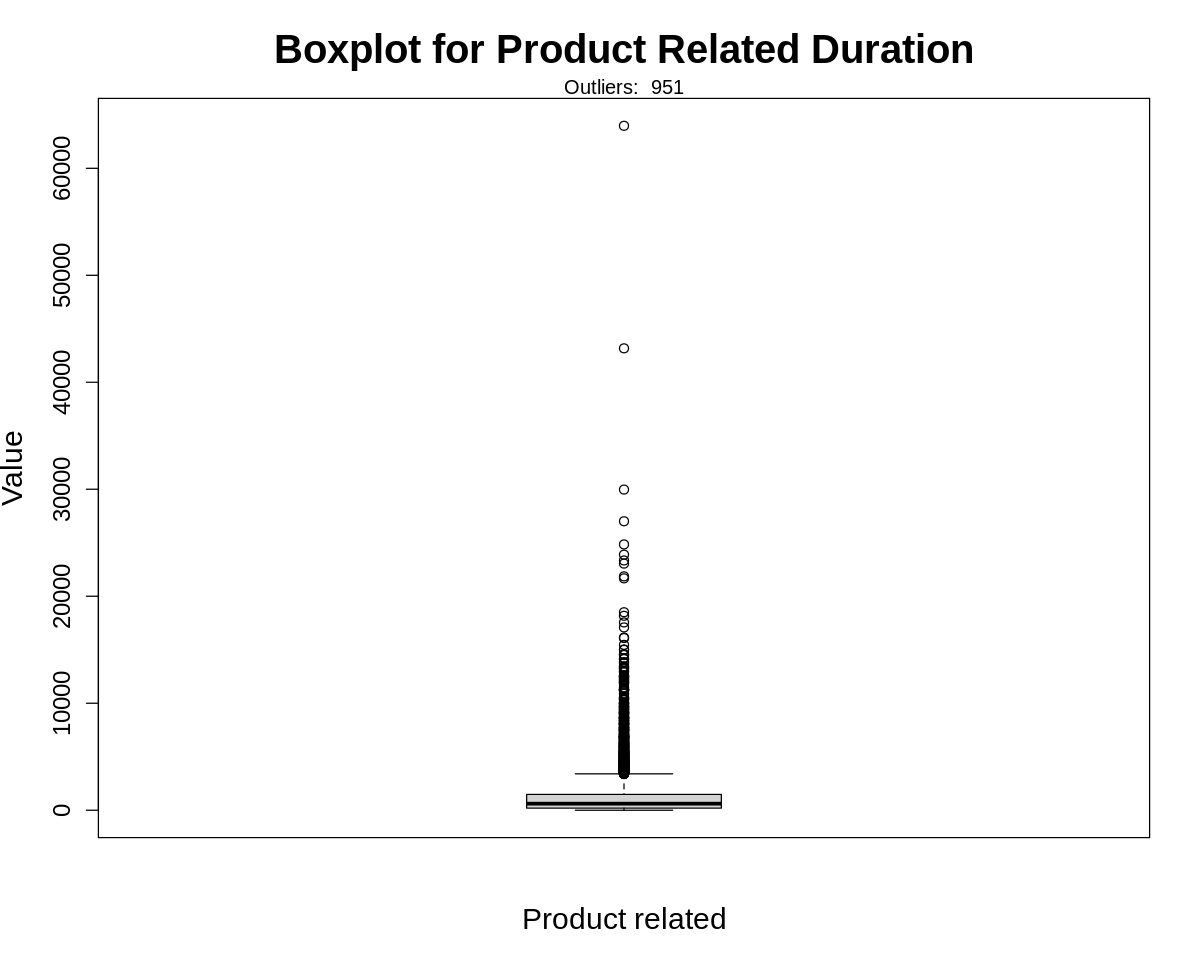

In [21]:
# plot a boxplot to check for outliers in the 'productrelated_duration' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$productrelated_duration, main="Boxplot for Product Related Duration", xlab = "Product related", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_productrelated_duration <- boxplot.stats(data$productrelated_duration)$out
mtext(paste("Outliers: ", paste(length(outlier_productrelated_duration), collapse=", ")), cex=1)

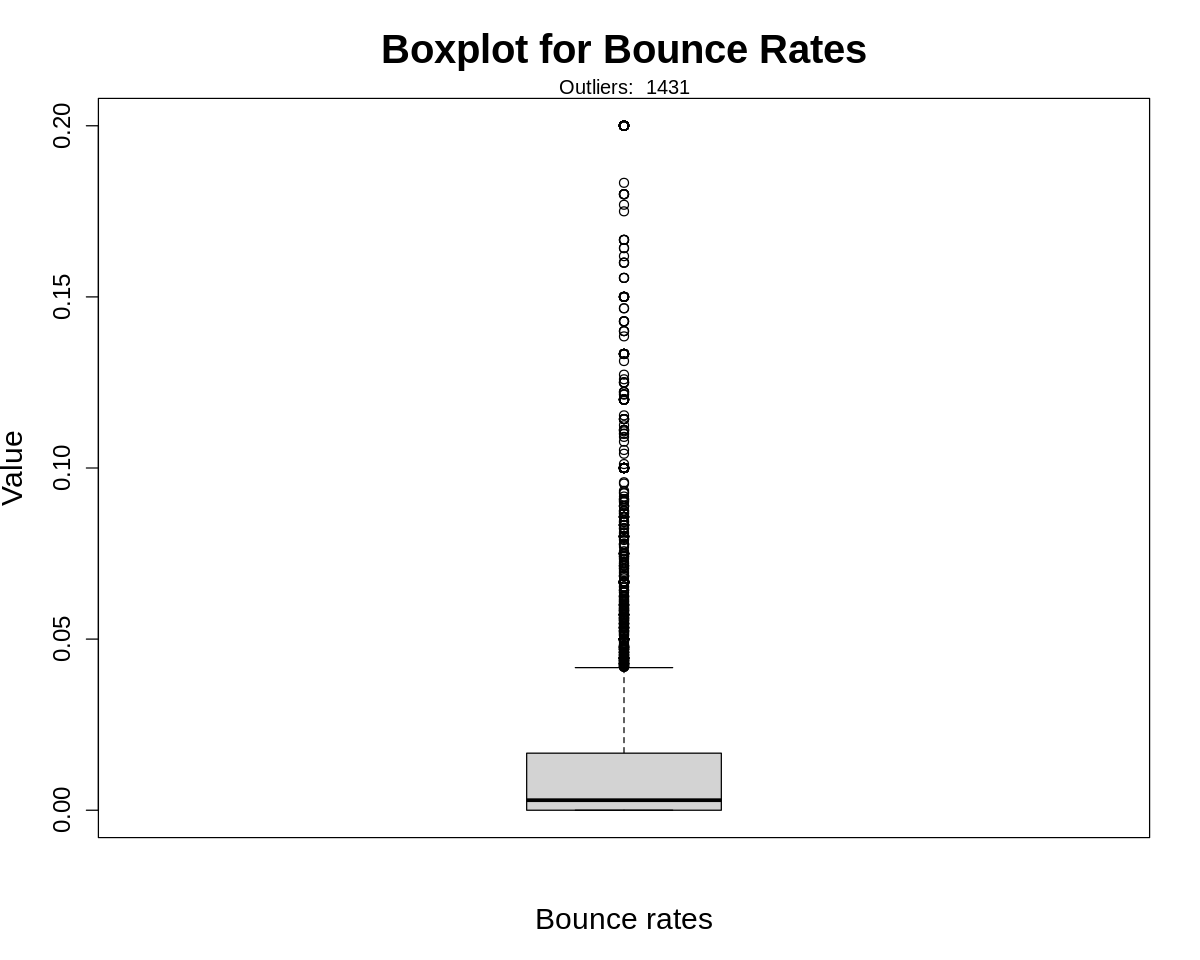

In [22]:
# plot a boxplot to check for outliers in the 'bouncerates' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$bouncerates, main="Boxplot for Bounce Rates", xlab = "Bounce rates", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_bouncerates <- boxplot.stats(data$bouncerates)$out
mtext(paste("Outliers: ", paste(length(outlier_bouncerates), collapse=", ")), cex=1)

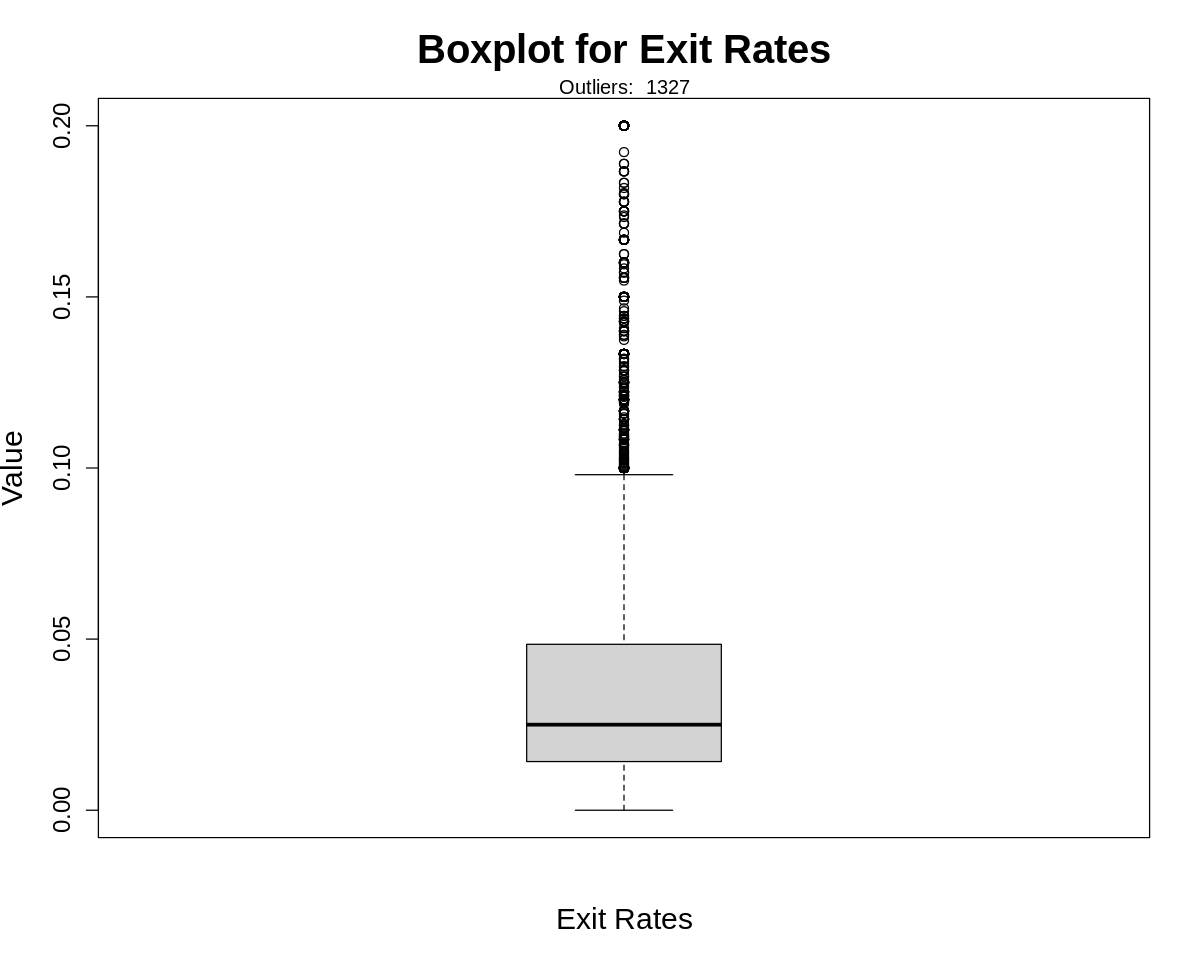

In [23]:
# plot a boxplot to check for outliers in the 'exitrates' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$exitrates, main="Boxplot for Exit Rates", xlab = "Exit Rates", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_exitrates <- boxplot.stats(data$exitrates)$out
mtext(paste("Outliers: ", paste(length(outlier_exitrates), collapse=", ")), cex=1)

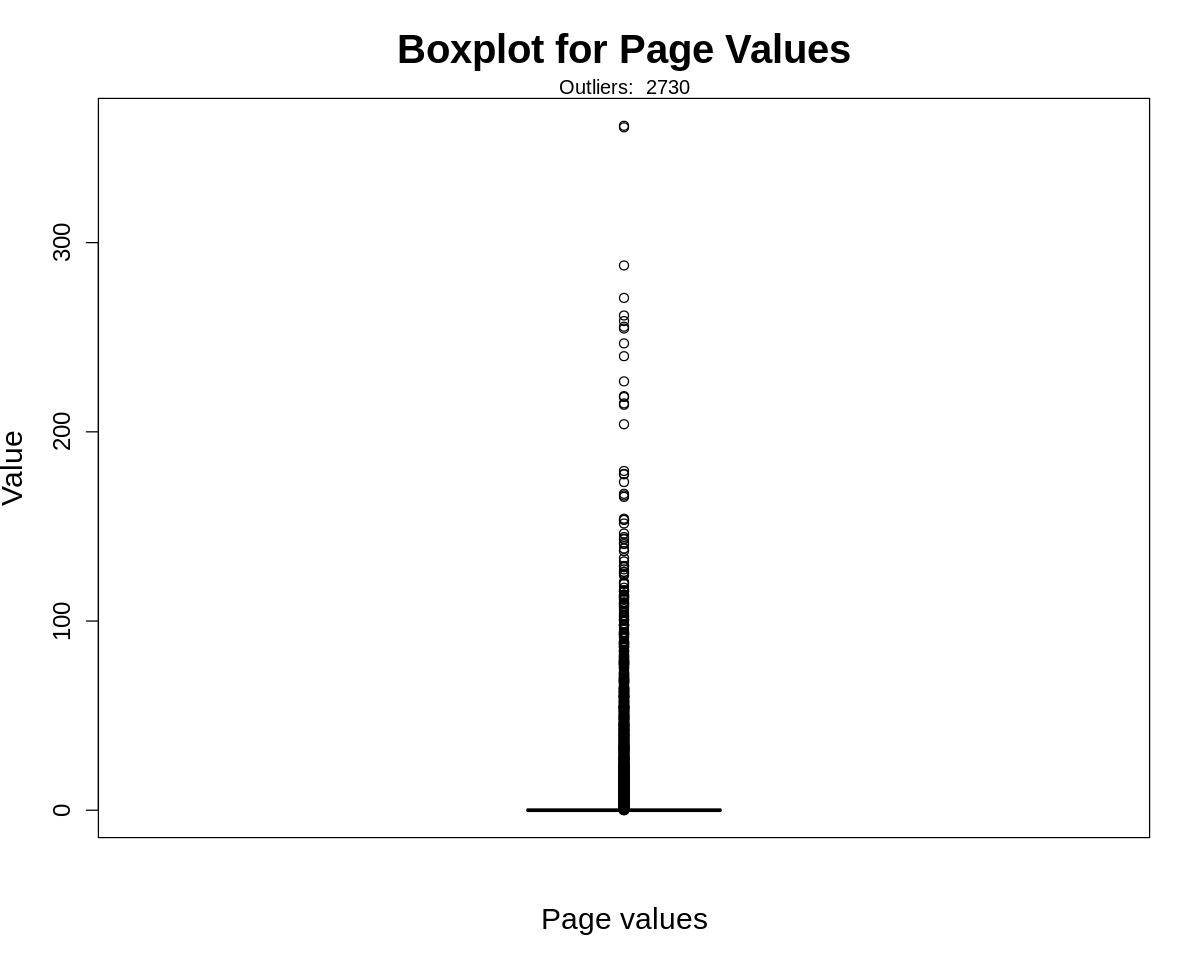

In [24]:
# plot a boxplot to check for outliers in the 'pagevalues' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$pagevalues, main="Boxplot for Page Values", xlab = "Page values", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_pagevalues <- boxplot.stats(data$pagevalues)$out
mtext(paste("Outliers: ", paste(length(outlier_pagevalues), collapse=", ")), cex=1)

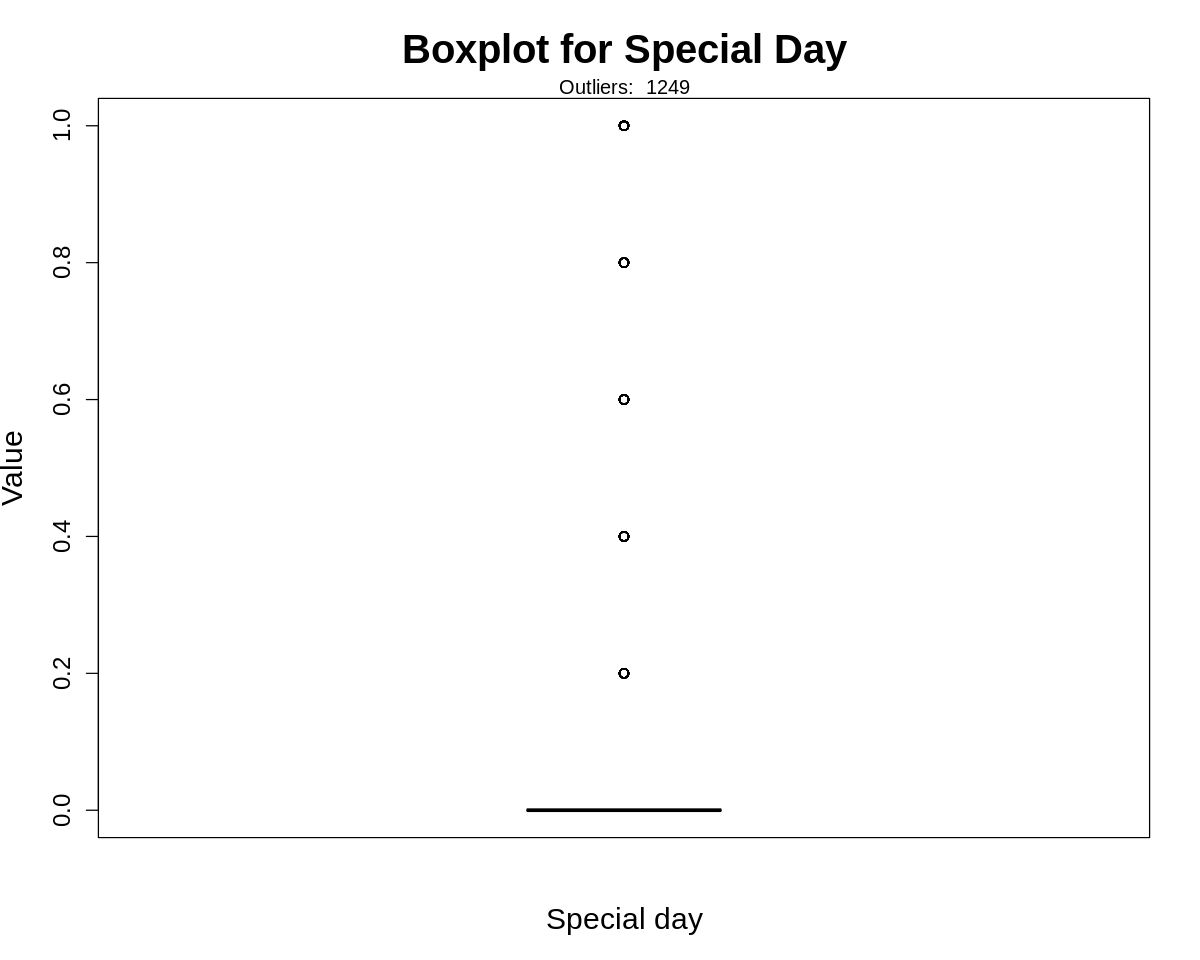

In [25]:
# plot a boxplot to check for outliers in the 'specialday' column and label it
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(data$specialday, main="Boxplot for Special Day", xlab = "Special day", ylab = "Value", boxwex=0.4, cex.main=2, cex.lab=1.5, cex.axis=1.2)

# display the number of outlier values in the column
outlier_specialday <- boxplot.stats(data$specialday)$out
mtext(paste("Outliers: ", paste(length(outlier_specialday), collapse=", ")), cex=1)

In [26]:
unique(data)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0.0,0,0,1,0.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,64.000000,0.000000000,0.100000000,0.00000,0.0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,2,2.666667,0.050000000,0.140000000,0.00000,0.0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0.0,0,0,10,627.500000,0.020000000,0.050000000,0.00000,0.0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,19,154.216667,0.015789474,0.024561404,0.00000,0.0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE
0,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.4,Feb,2,4,3,3,Returning_Visitor,FALSE,FALSE
1,-1.0,0,-1,1,-1.000000,0.200000000,0.200000000,0.00000,0.0,Feb,1,2,1,5,Returning_Visitor,TRUE,FALSE
0,0.0,0,0,2,37.000000,0.000000000,0.100000000,0.00000,0.8,Feb,2,2,2,3,Returning_Visitor,FALSE,FALSE


In [29]:
# find the number of rows with 'Other' as the visitor type
sum(data$visitortype == 'Other')

# Dropping records with other in the visitor tye column
data <- data[!(data$visitortype =="Other")]


[1] 0

In [30]:
# change the data types of 'operatingsystems', 'browser', 'region' and 'traffictype' columns to 'factor'
data <- transform(data, operatingsystems=as.factor(operatingsystems), browser=as.factor(browser), region=as.factor(region), traffictype=as.factor(traffictype))

In [31]:
# Printing the new cleaned dataset

head(data)

administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


## Exploratory Data Analysis

In [32]:
# identify numerical variables in the dataframe
num_col <- unlist(lapply(data, is.numeric))

num_data <- subset(data, select=num_col) 

In [35]:
stats <- data.frame(
  Mean = apply(num_data, 2, mean), 
  Median = apply(num_data, 2, median), 
  Mode = apply(num_data, 2, mfv ), 
  Min = apply(num_data, 2, min),  
  Max = apply(num_data, 2, max),    
  Variance= apply(num_data, 2, var),  
  Std = apply(num_data, 2, sd),
  Skewness = apply(num_data, 2, skewness), 
  Kurtosis = apply(num_data, 2, kurtosis)) 

stats <- round(stats, 2)
stats


,Mean,Median,Mode,Min,Max,Variance,Std,Skewness,Kurtosis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
administrative,2.35,1.00,0.0,0,27.00,11.12,3.33,1.94,7.62
administrative_duration,81.79,9.50,0.0,-1,3398.75,31438.36,177.31,5.58,53.18
informational,0.51,0.00,0.0,0,24.00,1.63,1.28,4.01,29.55
informational_duration,34.99,0.00,0.0,-1,2549.38,20116.11,141.83,7.52,78.12
productrelated,32.19,18.00,1.0,0,705.00,1995.42,44.67,4.33,33.99
productrelated_duration,1211.58,614.70,0.0,-1,63973.52,3697301.41,1922.84,7.25,139.58
bouncerates,0.02,0.00,0.0,0,0.20,0.00,0.05,3.16,12.36
exitrates,0.04,0.03,0.2,0,0.20,0.00,0.05,2.24,7.67
pagevalues,5.86,0.00,0.0,0,361.76,329.79,18.16,6.09,61.93


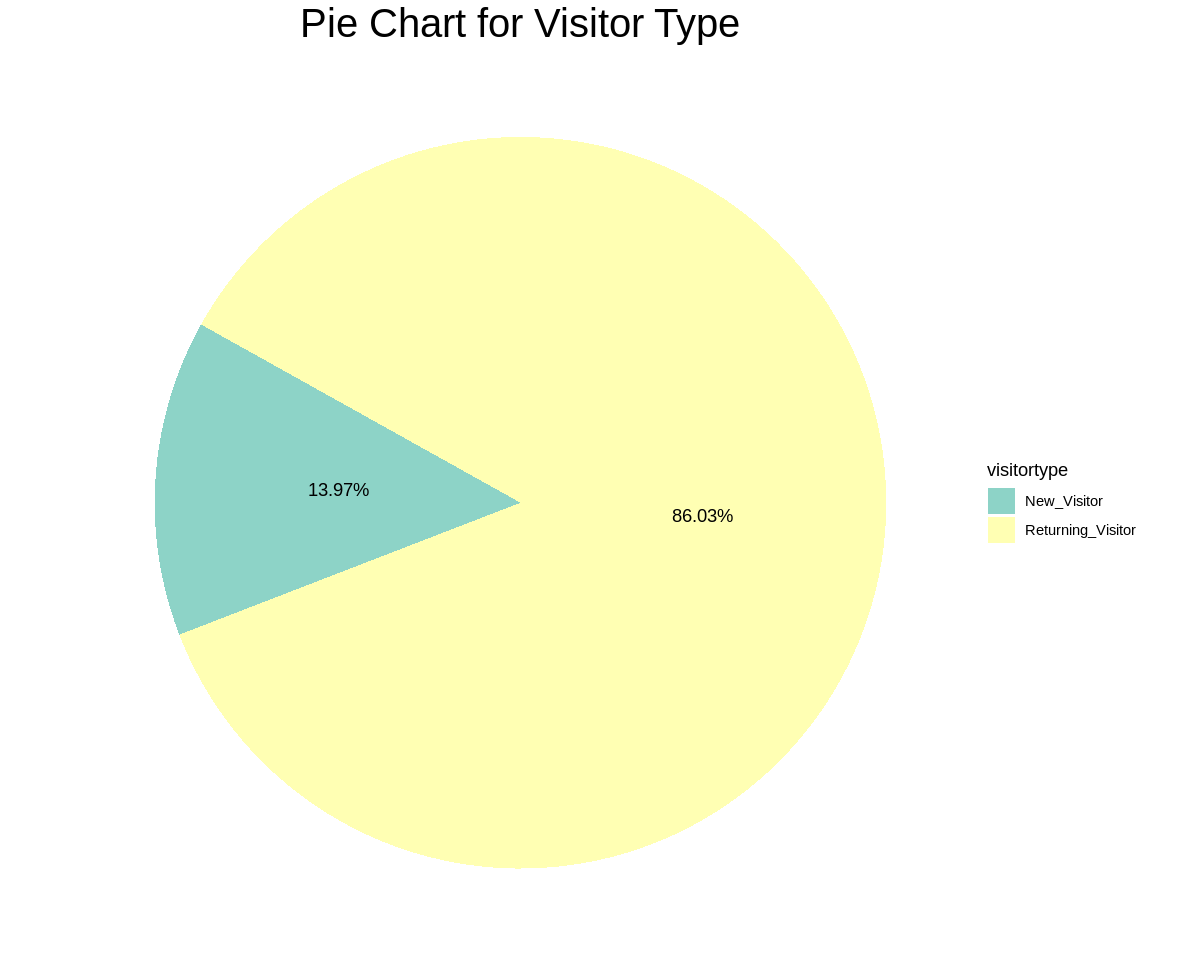

In [36]:
# plot a pie chart to visualize the proportion of values in the 'visitortype' column
data.visitortype = data %>% 
  filter(visitortype != "NA") %>% 
  group_by(visitortype) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(visitortype)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.visitortype, 
       aes(x = "", y = percentage, fill = visitortype))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Set3") + labs(title= 'Pie Chart for Visitor Type') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))


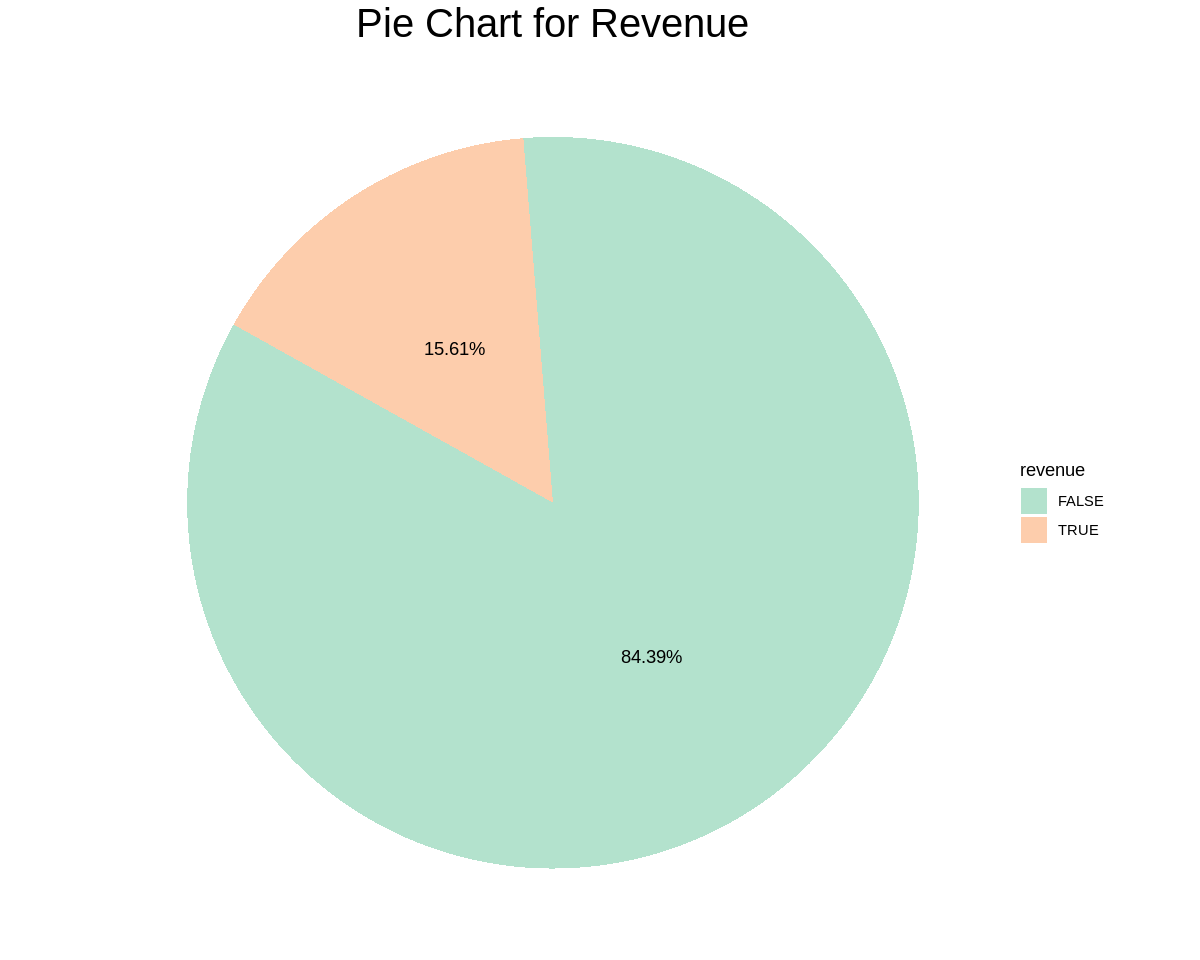

In [37]:
# plot a pie chart to visualize the proportion of values in the 'revenue' column
data.revenue = data %>% 
  filter(revenue != "NA") %>% 
  group_by(revenue) %>% 
  count() %>% 
  ungroup()%>% 
  arrange(desc(revenue)) %>%
  mutate(percentage = round(n/sum(n),4)*100,
         lab.pos = cumsum(percentage)-.5*percentage)
ggplot(data = data.revenue, 
       aes(x = "", y = percentage, fill = revenue))+
  geom_bar(stat = "identity")+
  coord_polar("y", start = 200) +
  geom_text(aes(y = lab.pos, label = paste(percentage,"%", sep = "")), col = "black") +
  theme_void() + scale_fill_brewer(palette = "Pastel2") + labs(title= 'Pie Chart for Revenue') + 
  theme(plot.title = element_text(hjust = 0.5, size = 24))

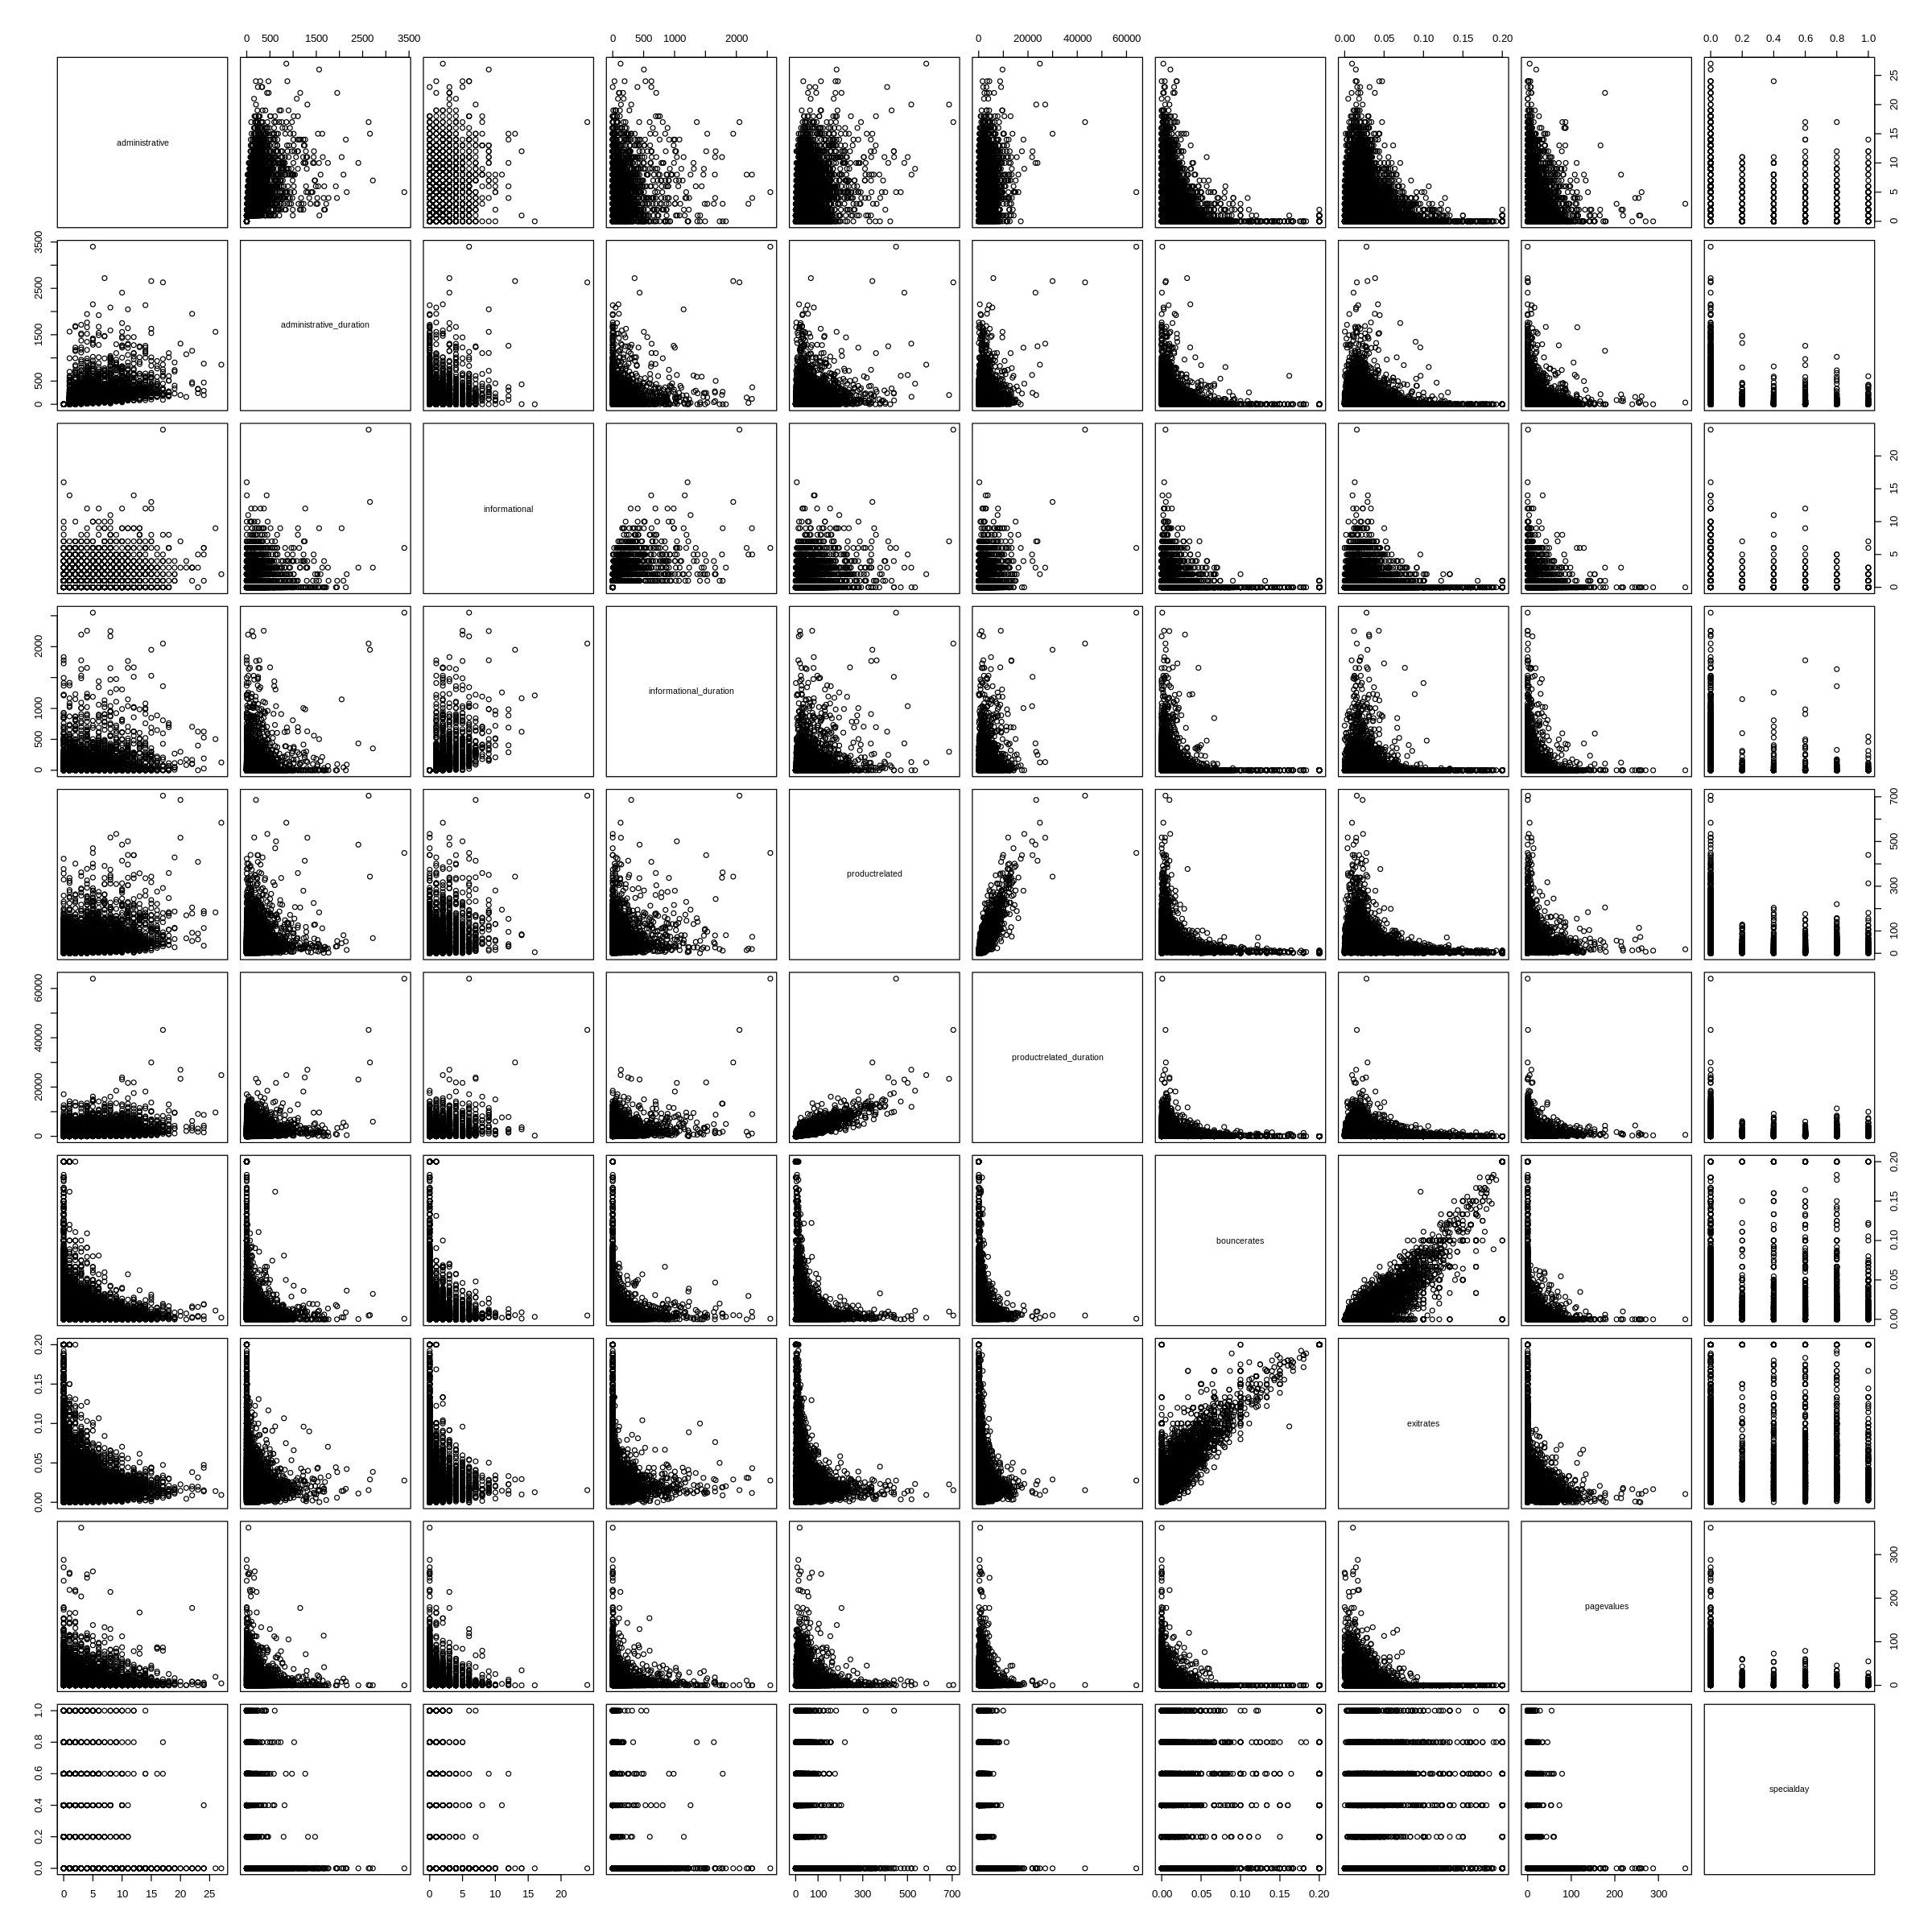

In [39]:
#  pair plots to view the distribution of the values per pair of variables
options(repr.plot.height = 20, repr.plot.width = 20)
pairs(num_data)

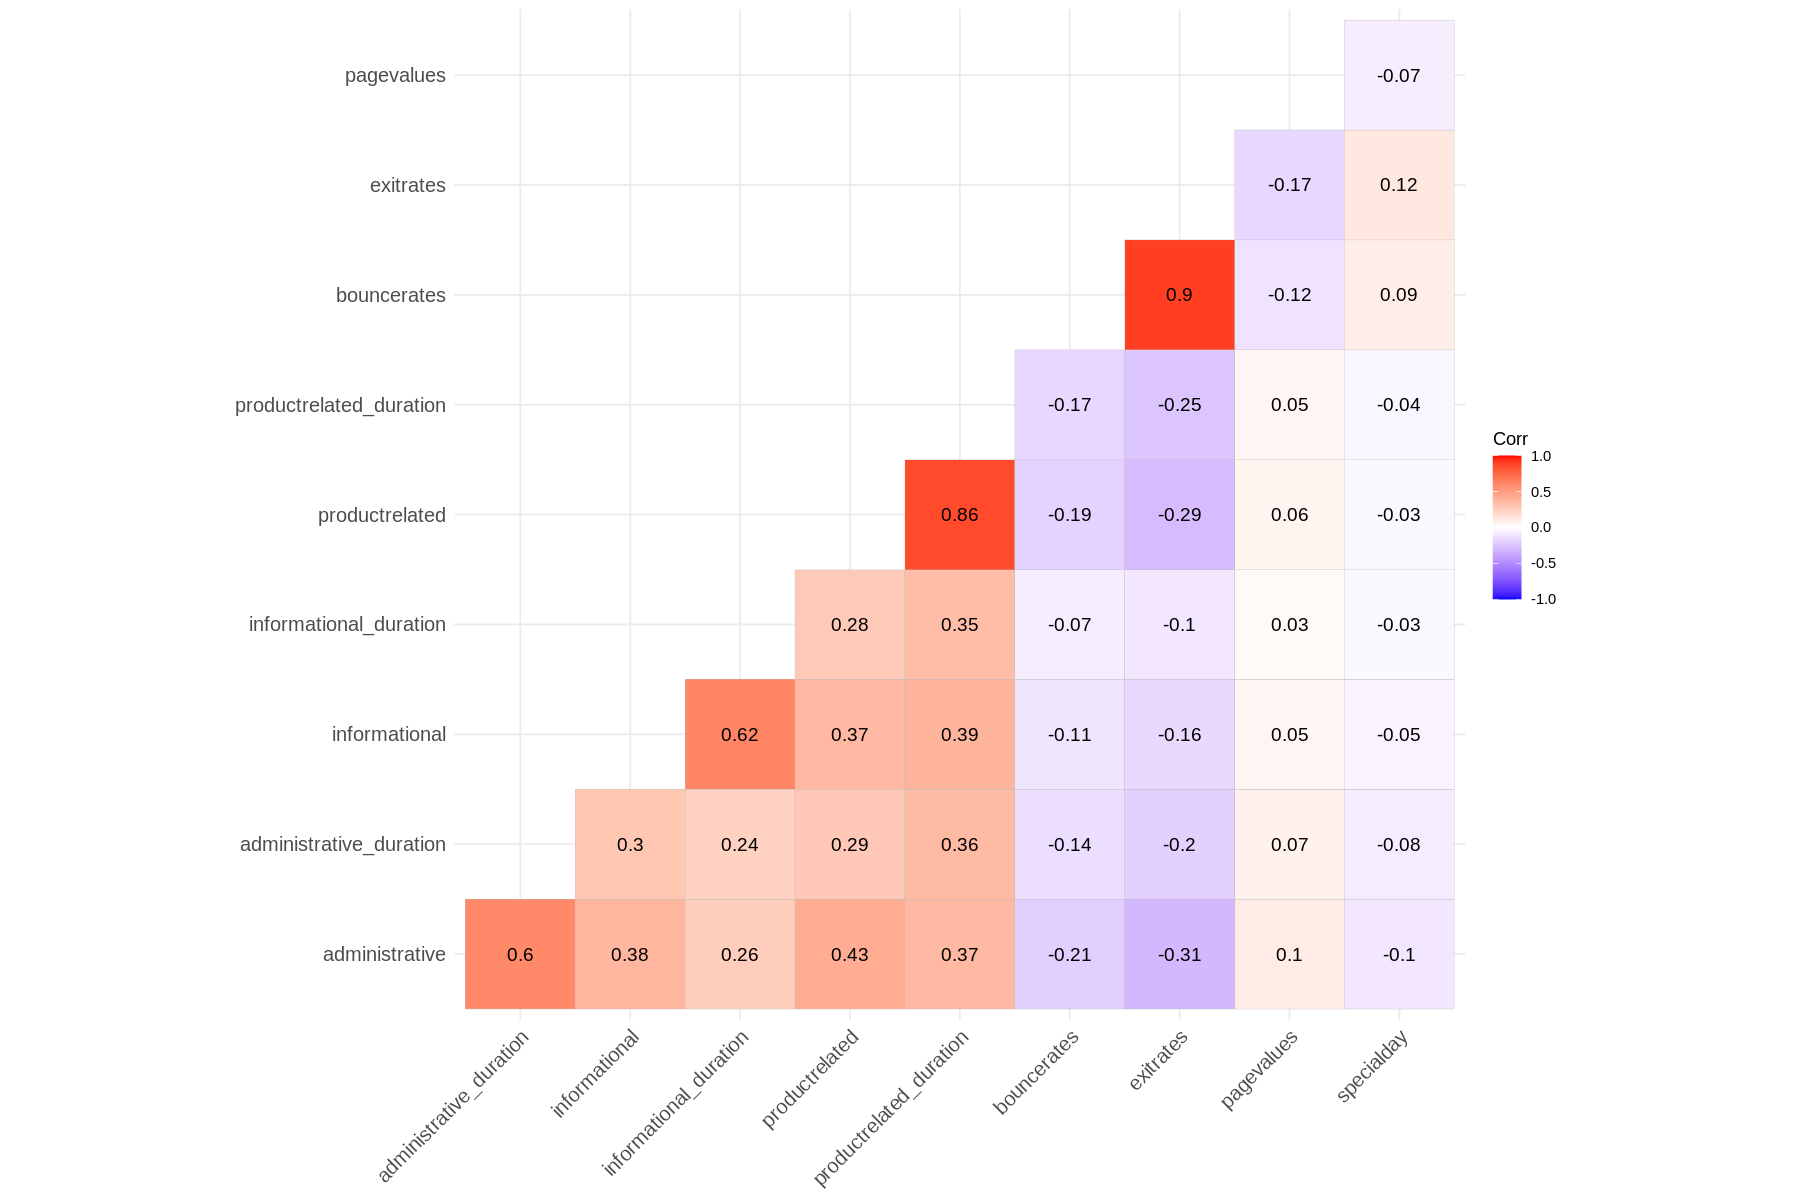

In [38]:
# correlation coefficients 
corr <- cor(num_data)

# plot a heat map to visualize correlations
options(repr.plot.height = 10, repr.plot.width = 15)

ggcorrplot(round(corr, 2) ,lab = T,type = 'lower')

## Implementing the Solution

### K-Means Clustering

In [42]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [43]:
# Preprocessing 

# removing the label ('revenue') from the dataset since we are doing unsupervised learning
data_model <- data[, 1:17]

# change the 'weekend' column's data type to 'factor'
data_model$weekend <- as.factor(data$weekend)

# one hot encode the categorical variables
dummy <- dummyVars("~ month + operatingsystems + browser + region + traffictype + visitortype + weekend", data=data_model)
encoded <- data.frame(predict(dummy, newdata = data_model))
data_model <- cbind(data_model[ , 1:10], encoded)

# normalize the values 
normal <-function(x) { (x -min(x))/(max(x)-min(x))}
data_norm <- as.data.frame(lapply(data_model, normal))

# preview the first few records
head(data_norm)


,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,⋯,traffictype.15,traffictype.16,traffictype.17,traffictype.18,traffictype.19,traffictype.20,visitortypeNew_Visitor,visitortypeReturning_Visitor,weekend.FALSE,weekend.TRUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.0002941393,0,0.0003920992,0.001418440,1.563122e-05,1.00000000,1.000000,0,0,⋯,0,0,0,0,0,0,0,1,1,0
2,0,0.0002941393,0,0.0003920992,0.002836879,1.016029e-03,0.00000000,0.500000,0,0,⋯,0,0,0,0,0,0,0,1,1,0
3,0,0.0000000000,0,0.0000000000,0.001418440,0.000000e+00,1.00000000,1.000000,0,0,⋯,0,0,0,0,0,0,0,1,1,0
4,0,0.0002941393,0,0.0003920992,0.002836879,5.731448e-05,0.25000000,0.700000,0,0,⋯,0,0,0,0,0,0,0,1,1,0
5,0,0.0002941393,0,0.0003920992,0.014184397,9.824223e-03,0.10000000,0.250000,0,0,⋯,0,0,0,0,0,0,0,1,0,1
6,0,0.0002941393,0,0.0003920992,0.026950355,2.426226e-03,0.07894737,0.122807,0,0,⋯,0,0,0,0,0,0,0,1,1,0


In [46]:
# performing K means clustering for 2 clusters

result<- kmeans(data_norm, 2, nstart = 25) 

# check the number of records in each cluster
result$size

[1] 2571 9547

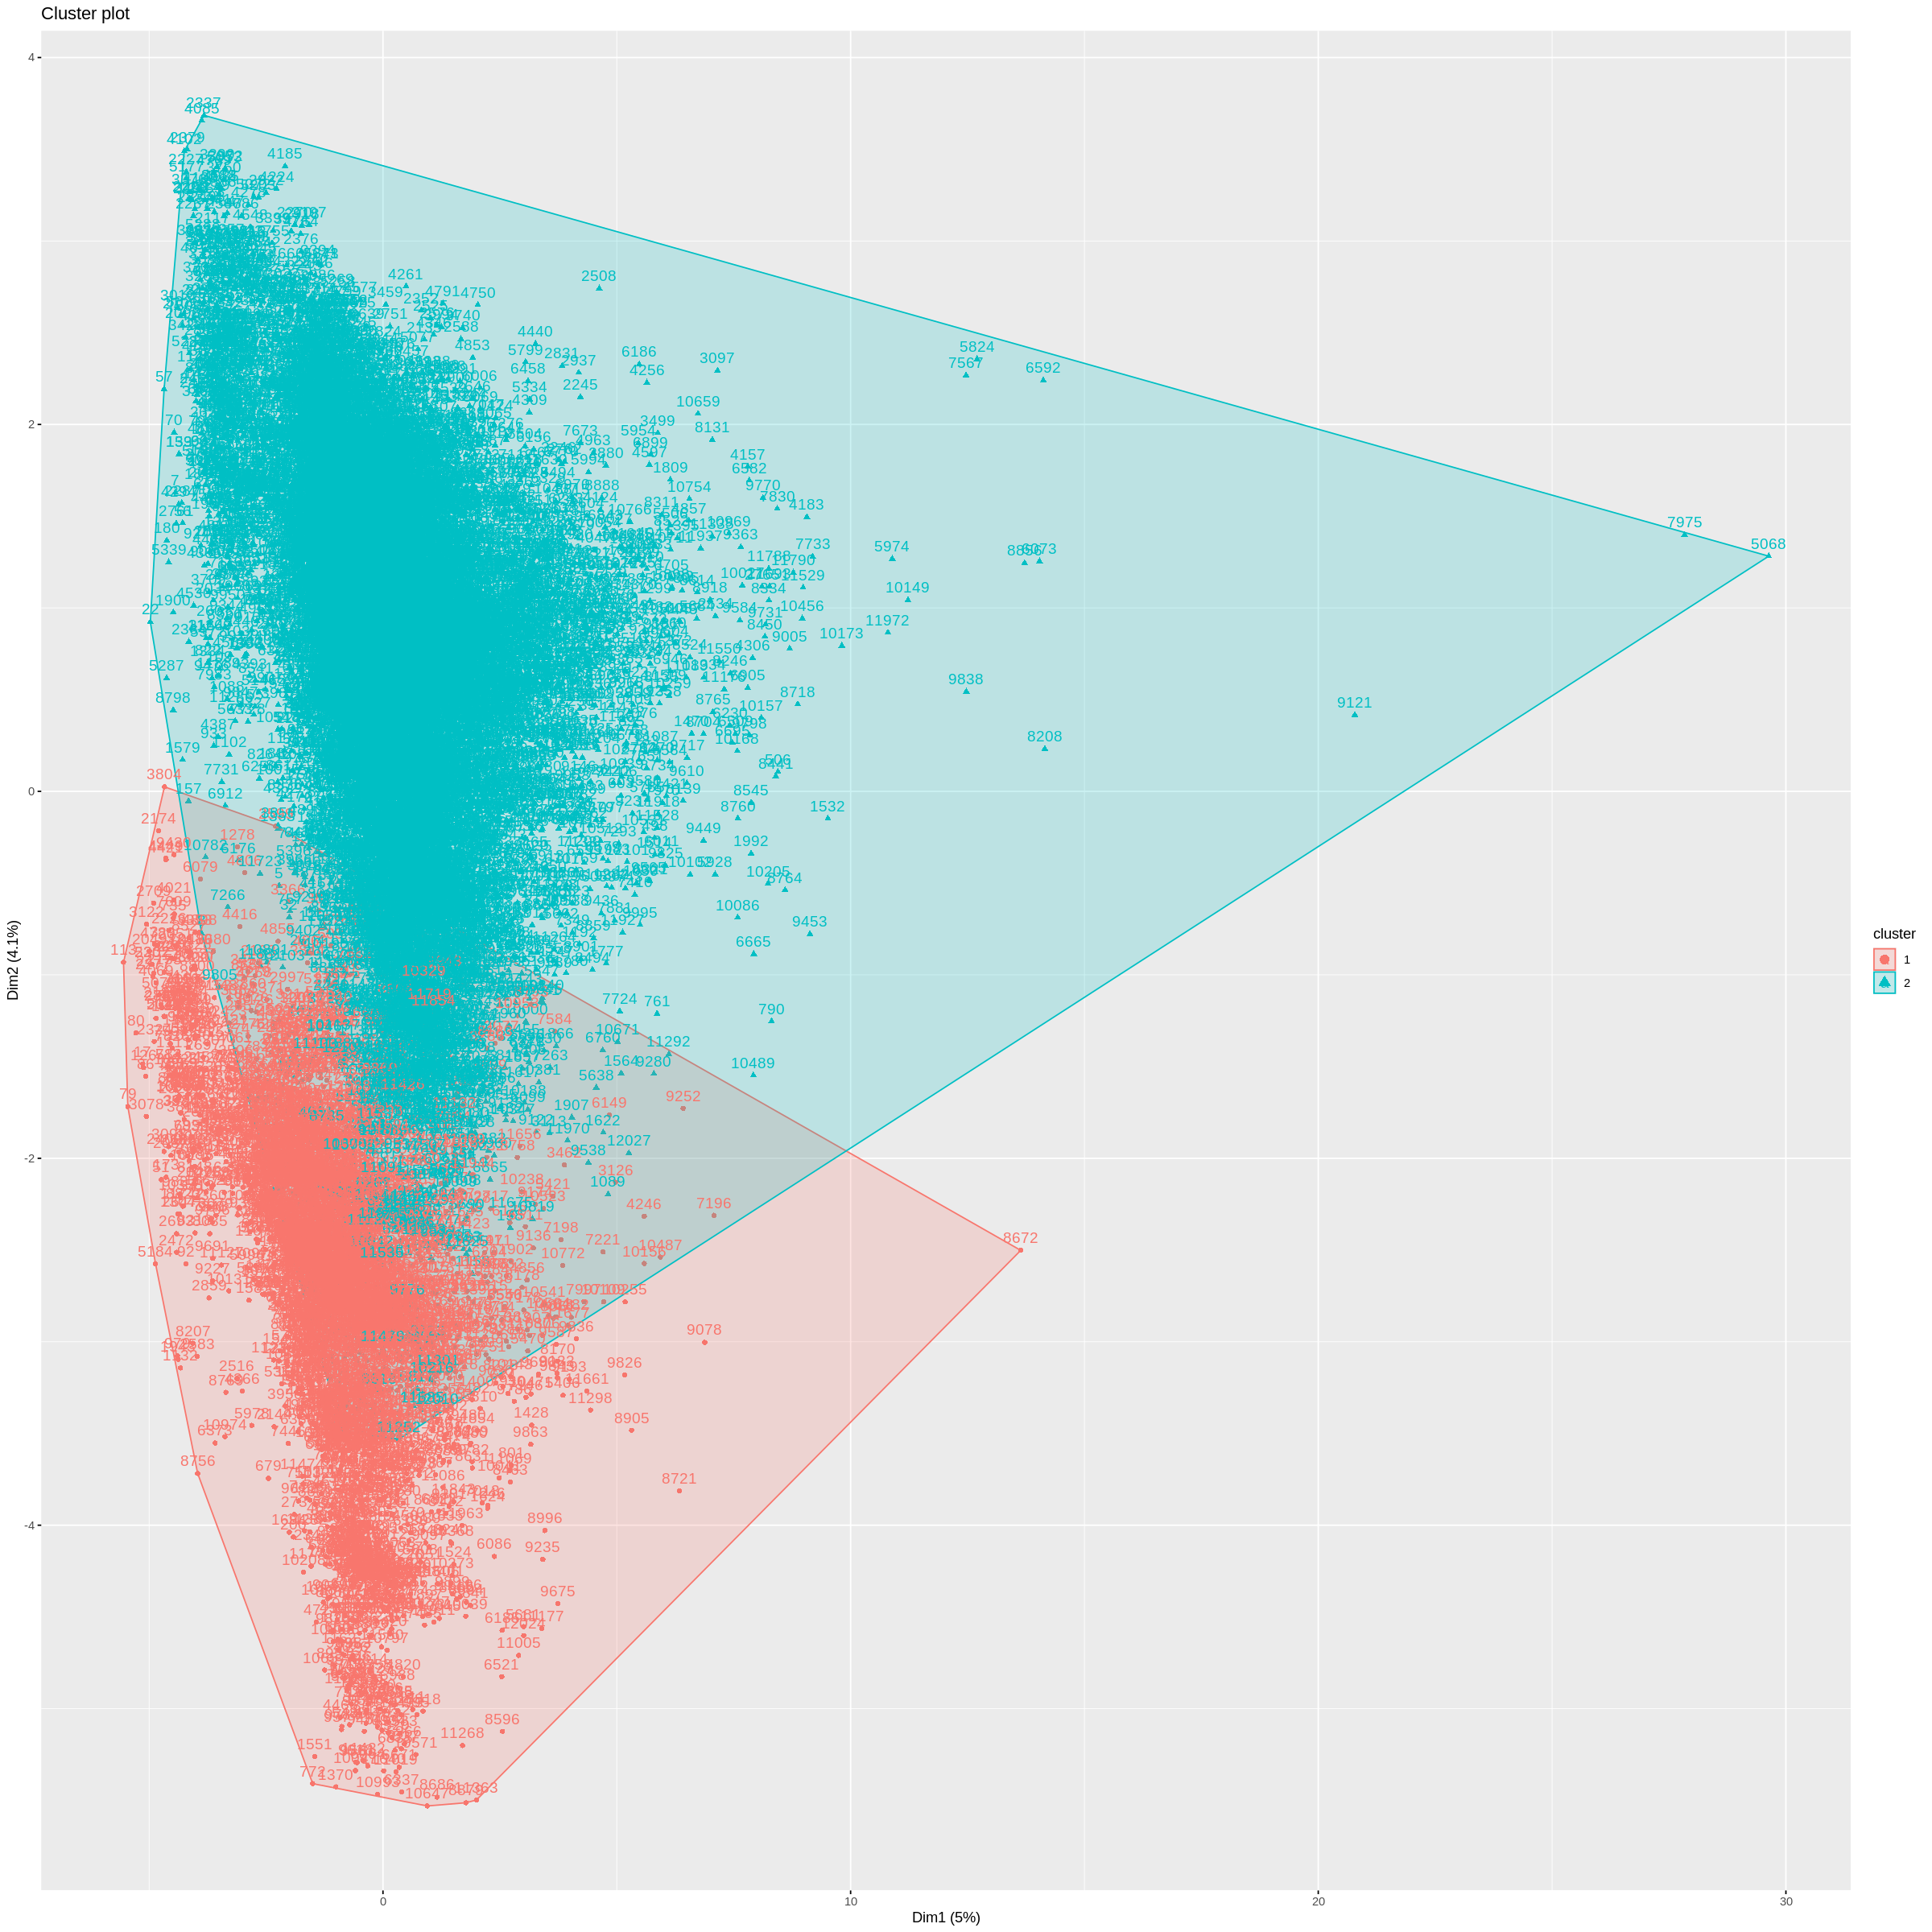

In [47]:
# Visualizing the clusters

# visualize the clusters
fviz_cluster(result, data = data_norm)

In [49]:
# checking the distribution of the classes ('revenue') in the different classes

table(result$cluster, data$revenue)

   
    FALSE TRUE
  1  2183  388
  2  8043 1504

### Hierarchical Clustering

In [50]:
# Computing the Euclidian distance between observations

d <- dist(data_norm, method = "euclidean")

In [51]:
# performing hierarchical clustering using the Ward's method

res.hc <- hclust(d, method = "ward.D2" )

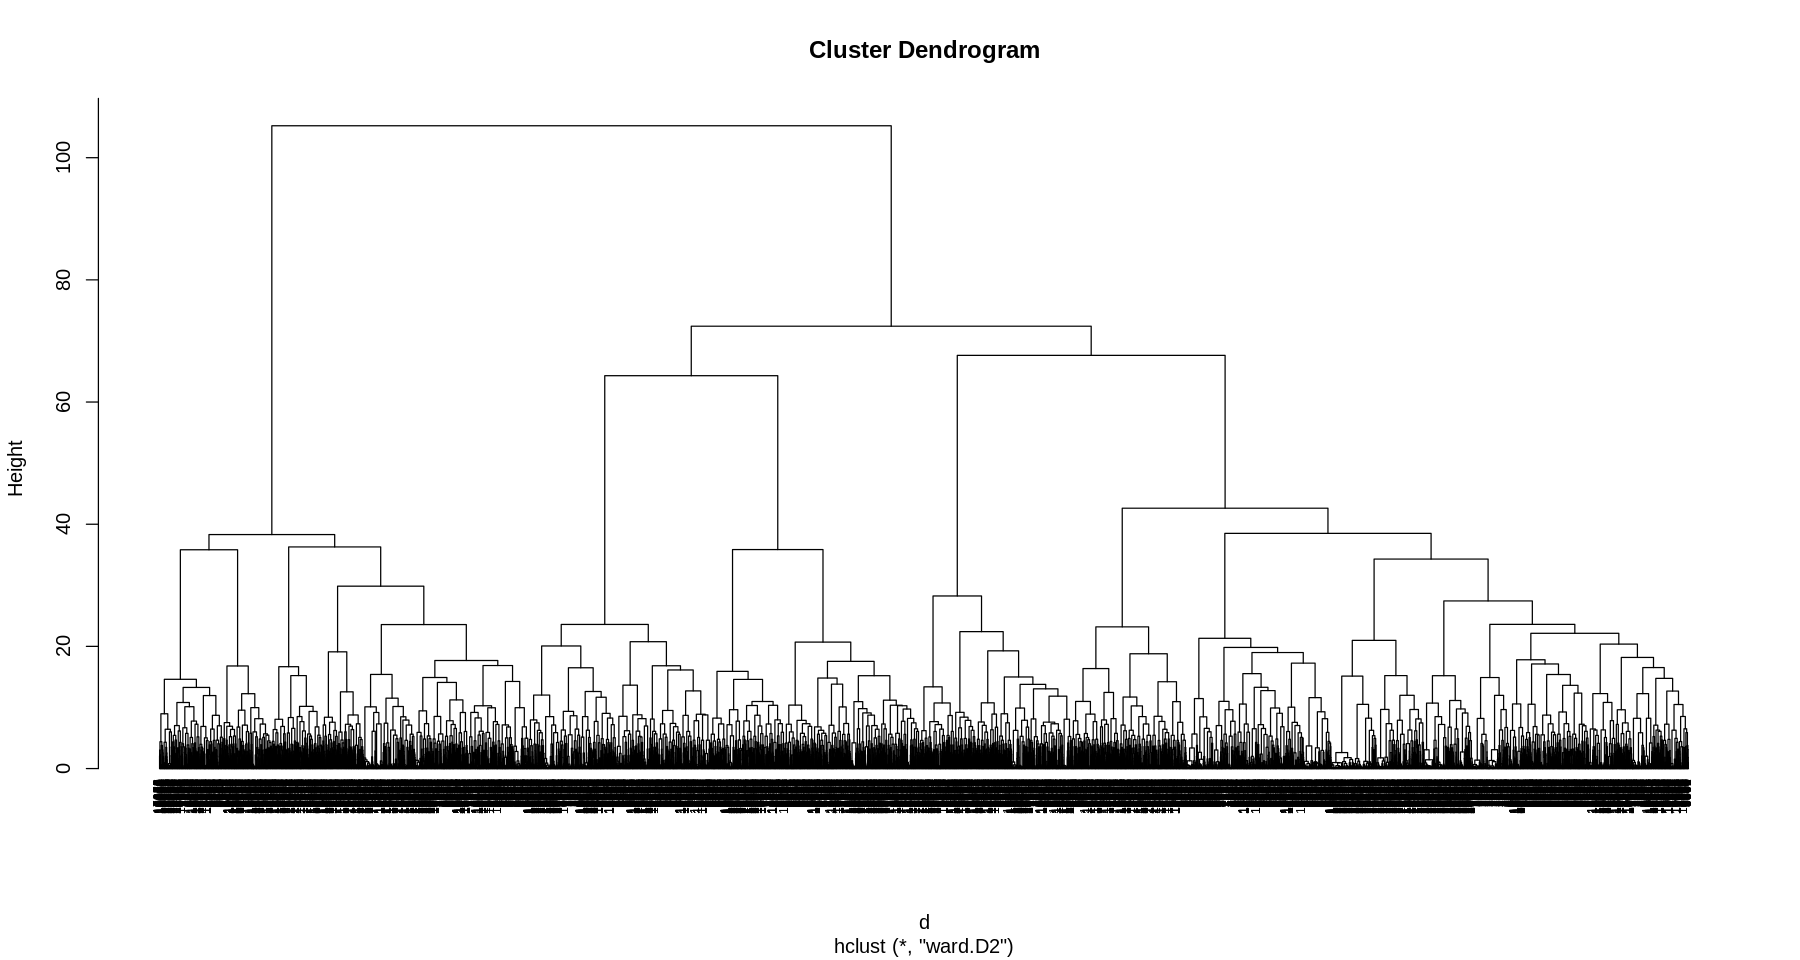

In [52]:
# plotting the resultant dendrogram
options(repr.plot.width = 15, repr.plot.height = 8)

plot(res.hc, cex = 0.6, hang = -1)

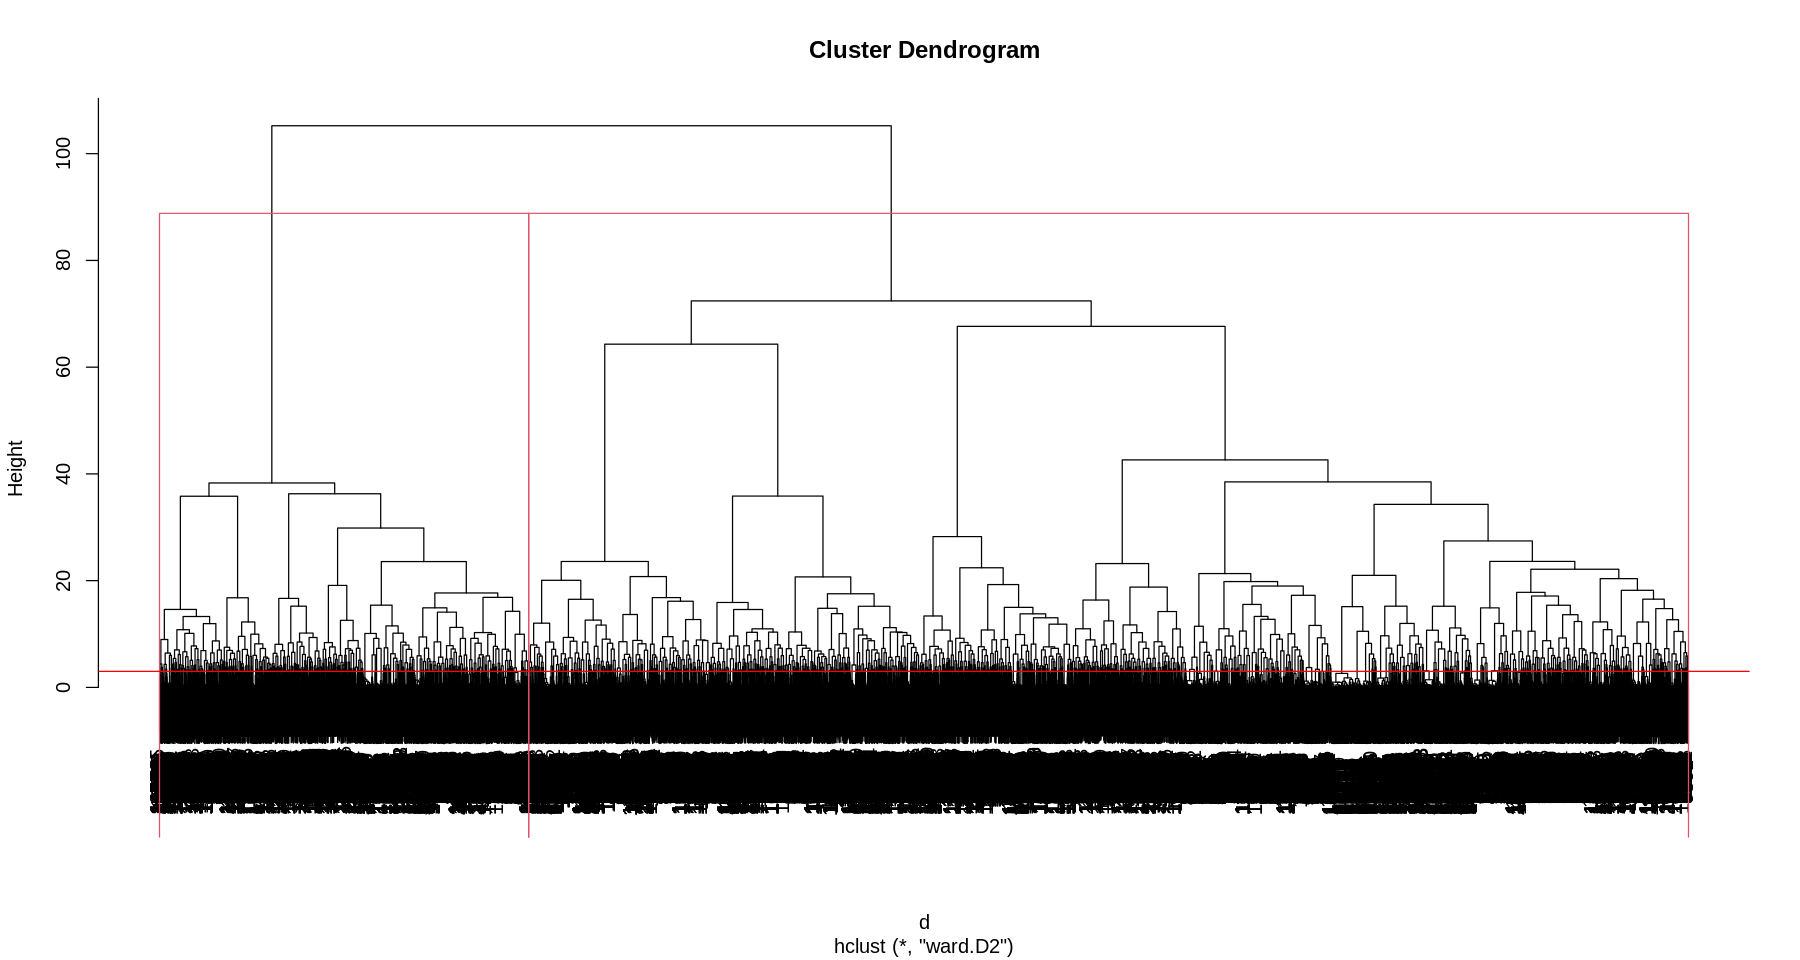

In [53]:
# checking the clusters on the dendrogram 
plot(res.hc)
rect.hclust(res.hc , k = 2)
abline(h = 3, col = 'red')

In [57]:
# check the distribution of the classes ('revenue') in the different classes
table(cut, data$revenue)

   
cut FALSE TRUE
  1  2486  440
  2  7740 1452

* The results show that the model correctly clustered 84.2% of the non-revenue generating visitors and only 15.04% of the revenue generating visitors. 

* The hierarchical model perfomed better at clustering the observations than the K-Means. 